In [1]:
import numpy as np
import polars as pl

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM

In [2]:
df = pd.read_csv('merge_data.csv')
df

,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,ICMP_Code,ICMP_Type,Total_TCP_Flow_Time,Label
0,80,6,92151,7,7,1590,196,1244,0,227.142857,...,0,0,0.0,0.0,0,0,-1,-1,92151,BENIGN
1,3389,6,2017033,10,9,2498,1581,677,0,249.800000,...,0,0,0.0,0.0,0,0,-1,-1,2017033,BENIGN
2,53,17,1771,1,1,34,125,34,34,34.000000,...,0,0,0.0,0.0,0,0,-1,-1,0,BENIGN
3,53,17,1254,1,1,45,134,45,45,45.000000,...,0,0,0.0,0.0,0,0,-1,-1,0,BENIGN
4,53,17,138215,2,2,60,174,30,30,30.000000,...,0,0,0.0,0.0,0,0,-1,-1,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415237,22,6,379886,23,21,1912,2665,640,0,83.130435,...,0,0,0.0,0.0,0,0,-1,-1,379886,SSH-BruteForce
5415238,22,6,388358,23,23,1928,2665,640,0,83.826087,...,0,0,0.0,0.0,0,0,-1,-1,388358,SSH-BruteForce
5415239,22,6,374336,25,21,1912,2665,640,0,76.480000,...,0,0,0.0,0.0,0,0,-1,-1,374336,SSH-BruteForce
5415240,22,6,371640,25,21,1912,2665,640,0,76.480000,...,0,0,0.0,0.0,0,0,-1,-1,371640,SSH-BruteForce


In [5]:
df['Label'].unique()

array(['BENIGN', 'Botnet Ares - Attempted', 'Botnet Ares',
       'FTP-BruteForce - Attempted', 'DoS Hulk', 'DoS Hulk - Attempted',
       'Web Attack - Brute Force - Attempted', 'Web Attack - Brute Force',
       'Web Attack - SQL', 'Web Attack - XSS',
       'Web Attack - SQL - Attempted', 'Web Attack - XSS - Attempted',
       'Infiltration - NMAP Portscan',
       'Infiltration - Dropbox Download - Attempted',
       'Infiltration - Dropbox Download',
       'Infiltration - Communication Victim Attacker', 'DoS GoldenEye',
       'DoS GoldenEye - Attempted', 'DoS Slowloris',
       'DoS Slowloris - Attempted', 'DDoS-LOIC-HTTP', 'DDoS-LOIC-UDP',
       'DDoS-LOIC-UDP - Attempted', 'SSH-BruteForce'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415242 entries, 0 to 5415241
Data columns (total 83 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Dst_Port                    int64  
 1   Protocol                    int64  
 2   Flow_Duration               int64  
 3   Total_Fwd_Packet            int64  
 4   Total_Bwd_packets           int64  
 5   Total_Length_of_Fwd_Packet  int64  
 6   Total_Length_of_Bwd_Packet  int64  
 7   Fwd_Packet_Length_Max       int64  
 8   Fwd_Packet_Length_Min       int64  
 9   Fwd_Packet_Length_Mean      float64
 10  Fwd_Packet_Length_Std       float64
 11  Bwd_Packet_Length_Max       int64  
 12  Bwd_Packet_Length_Min       int64  
 13  Bwd_Packet_Length_Mean      float64
 14  Bwd_Packet_Length_Std       float64
 15  Flow_Bytes_s                float64
 16  Flow_Packets_s              float64
 17  Flow_IAT_Mean               float64
 18  Flow_IAT_Std                float64
 19  Flow_IAT_Max         

In [8]:
df[df['Label'] !='BENIGN']['Label'].value_counts()

Label
DoS Hulk                                        1803160
FTP-BruteForce - Attempted                       298874
DDoS-LOIC-HTTP                                   289328
Botnet Ares                                      142921
SSH-BruteForce                                    94197
Infiltration - NMAP Portscan                      39634
DoS GoldenEye                                     22560
DoS Slowloris                                      8490
DoS GoldenEye - Attempted                          4301
DoS Slowloris - Attempted                          2280
DDoS-LOIC-UDP                                       797
Botnet Ares - Attempted                             262
Infiltration - Communication Victim Attacker        161
Web Attack - Brute Force - Attempted                137
Web Attack - Brute Force                            131
Web Attack - XSS                                    113
DoS Hulk - Attempted                                 86
DDoS-LOIC-UDP - Attempted                 

In [7]:
df[df['Label'] =='BENIGN']['Label'].value_counts()

Label
BENIGN    2707621
Name: count, dtype: int64

In [8]:
df['Label'] = df['Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')


In [10]:
df['Label'].value_counts()

Label
BENIGN    2707621
ATTACK    2707621
Name: count, dtype: int64

In [11]:
print("Nombre de doublons dans 'data' :", df.duplicated().sum())

Nombre de doublons dans 'data' : 856553


In [12]:
df = df.drop_duplicates()


In [13]:
print("Nombre de doublons dans 'data' :", df.duplicated().sum())

Nombre de doublons dans 'data' : 0


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plotCorrelationMatrix(df, graphWidth):
   
    
    # Drop columns with NaN values and keep columns with more than one unique value
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])

    # If there are fewer than 2 numeric columns, exit
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant numeric columns ({df.shape[1]}) is less than 2')
        return

    # Calculate correlation matrix
    corr = df.corr()

    # Plot correlation matrix with annotations
    plt.figure(figsize=(graphWidth, graphWidth))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()

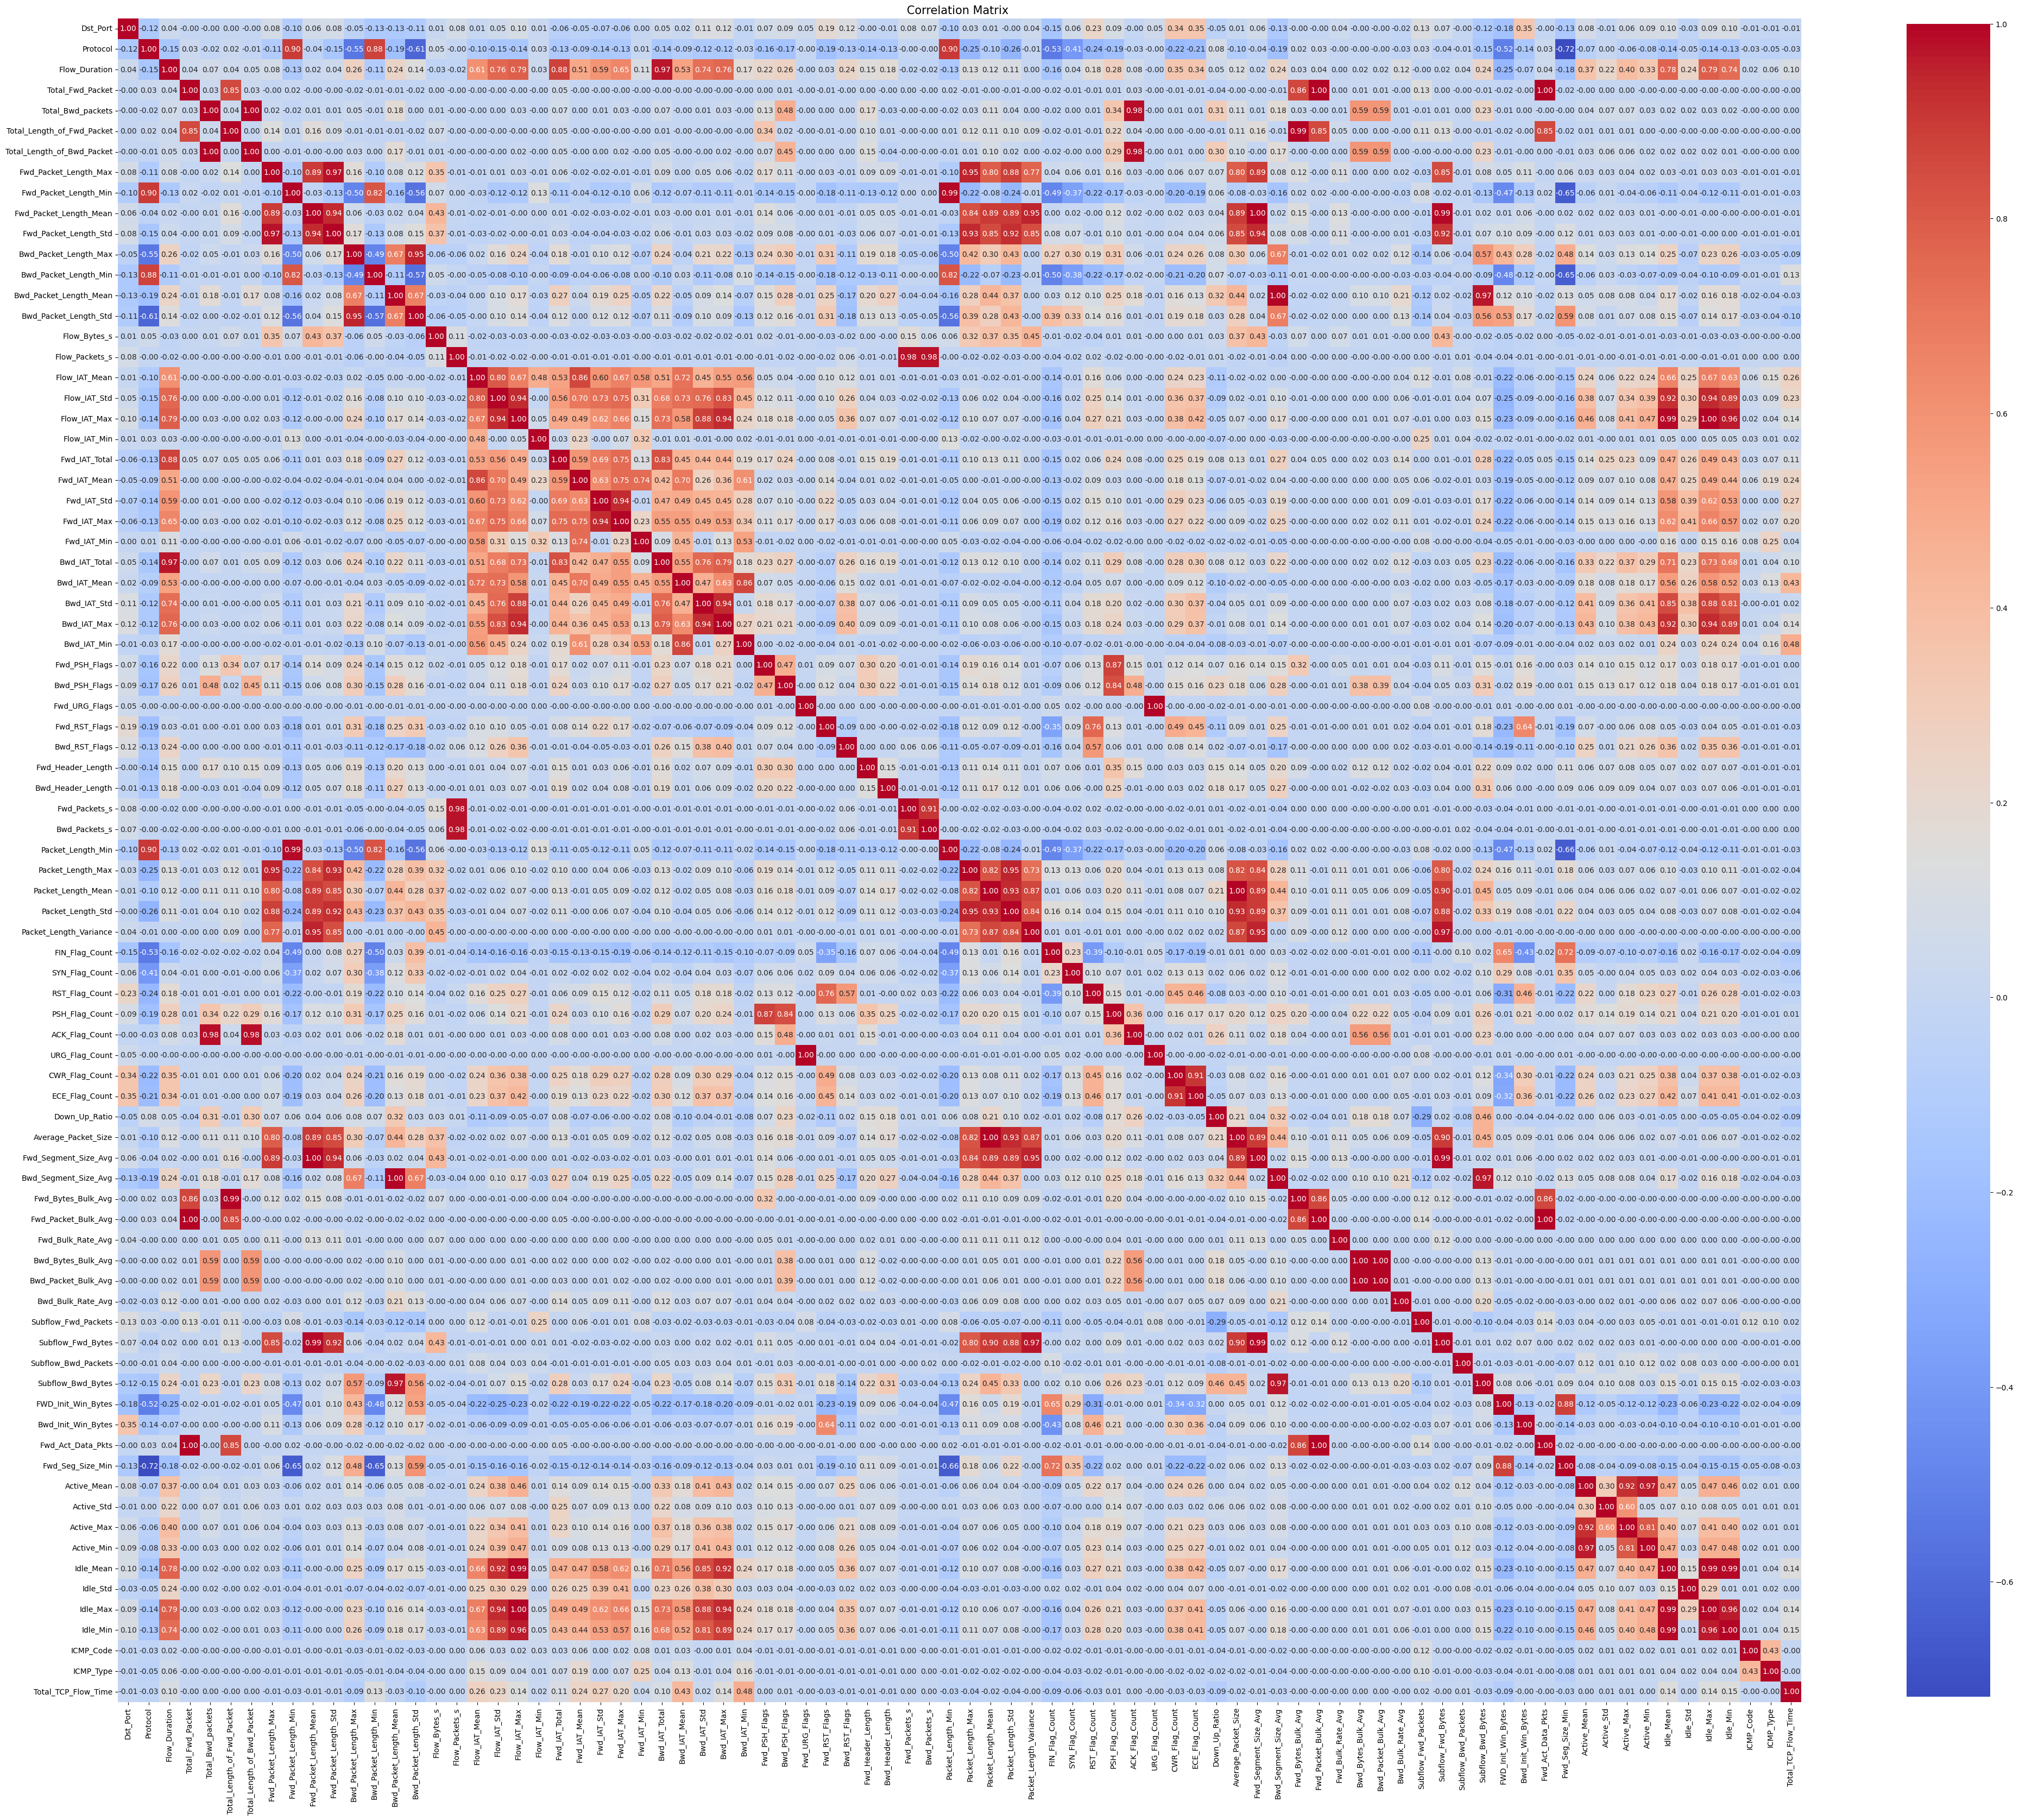

In [16]:
plotCorrelationMatrix(df, 50)


In [17]:
import numpy as np
import pandas as pd


def remove_highly_correlated_columns(df, threshold=0.9, label_col='Label'):
    # Save the original label column if it exists
    if label_col in df.columns:
        label_data = df[label_col]
    else:
        label_data = None

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr().abs()  # Take absolute value to consider both positive and negative correlations
    
    # Select upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find index of columns with correlation greater than the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    # Drop the columns
    df_reduced = numeric_df.drop(columns=to_drop)
    
    # Optionally, keep track of dropped columns for reference
    to_drop_df = numeric_df[to_drop]  # Collect only the dropped columns

    # Add back the label column if it was saved
    if label_data is not None:
        df_reduced[label_col] = label_data

    print(f"Removed {len(to_drop)} columns with correlation above {threshold}.")
    print("Dropped columns:", to_drop)
    return df_reduced, to_drop_df



In [18]:
df_reduced,to_drop=remove_highly_correlated_columns(df)

Removed 30 columns with correlation above 0.9.
Dropped columns: ['Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Std', 'Flow_IAT_Max', 'Fwd_IAT_Max', 'Bwd_IAT_Total', 'Bwd_IAT_Max', 'Fwd_Packets_s', 'Bwd_Packets_s', 'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Std', 'Packet_Length_Variance', 'ACK_Flag_Count', 'URG_Flag_Count', 'ECE_Flag_Count', 'Average_Packet_Size', 'Fwd_Segment_Size_Avg', 'Bwd_Segment_Size_Avg', 'Fwd_Bytes_Bulk_Avg', 'Fwd_Packet_Bulk_Avg', 'Bwd_Packet_Bulk_Avg', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Bytes', 'Fwd_Act_Data_Pkts', 'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Max', 'Idle_Min']


In [19]:
to_drop.shape

(4558689, 30)

In [20]:
df_reduced.columns

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Total_Fwd_Packet',
       'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Flow_Bytes_s',
       'Flow_Packets_s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Min',
       'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_RST_Flags', 'Bwd_RST_Flags',
       'Fwd_Header_Length', 'Bwd_Header_Length', 'Packet_Length_Mean',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count',
       'CWR_Flag_Count', 'Down_Up_Ratio', 'Fwd_Bulk_Rate_Avg',
       'Bwd_Bytes_Bulk_Avg', 'Bwd_Bulk_Rate_Avg', 'Subflow_Fwd_Packets',
       'Subflow_Bwd_Packets', 'FWD_Init_Win_Bytes', 'Bwd_Init_Win_Bytes',
       'Fwd_Seg_Size_Min', 'Active_M

In [21]:
print("Memory usage before optimization:")
print(df_reduced.memory_usage(deep=True).sum() / (1024 ** 2), "MB")

# Convert int64 to int32 and float64 to float32
df_reduced = df_reduced.astype({col: 'int32' for col in df_reduced.select_dtypes(include=['int64']).columns})
df_reduced = df_reduced.astype({col: 'float32' for col in df_reduced.select_dtypes(include=['float64']).columns})

# Check memory usage after optimization
print("Memory usage after optimization:")
print(df_reduced.memory_usage(deep=True).sum() / (1024 ** 2), "MB")

# Verify new data types
print(df_reduced.dtypes)

Memory usage before optimization:
2117.2347478866577 MB
Memory usage after optimization:
1212.95378780365 MB
Dst_Port                        int32
Protocol                        int32
Flow_Duration                   int32
Total_Fwd_Packet                int32
Total_Bwd_packets               int32
Total_Length_of_Fwd_Packet      int32
Fwd_Packet_Length_Max           int32
Fwd_Packet_Length_Min           int32
Fwd_Packet_Length_Mean        float32
Bwd_Packet_Length_Max           int32
Bwd_Packet_Length_Min           int32
Bwd_Packet_Length_Mean        float32
Flow_Bytes_s                  float32
Flow_Packets_s                float32
Flow_IAT_Mean                 float32
Flow_IAT_Std                  float32
Flow_IAT_Min                    int32
Fwd_IAT_Total                   int32
Fwd_IAT_Mean                  float32
Fwd_IAT_Std                   float32
Fwd_IAT_Min                     int32
Bwd_IAT_Mean                  float32
Bwd_IAT_Std                   float32
Bwd_IAT_Min      

In [22]:
df_reduced

,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Bwd_Packet_Length_Max,...,FWD_Init_Win_Bytes,Bwd_Init_Win_Bytes,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Idle_Std,ICMP_Code,ICMP_Type,Total_TCP_Flow_Time,Label
0,80,6,92151,7,7,1590,1244,0,227.142853,196,...,8192,1024,20,0.0,0.0,0.0,-1,-1,92151,BENIGN
1,3389,6,2017033,10,9,2498,677,0,249.800003,1173,...,8192,62856,20,0.0,0.0,0.0,-1,-1,2017033,BENIGN
2,53,17,1771,1,1,34,34,34,34.000000,125,...,0,0,8,0.0,0.0,0.0,-1,-1,0,BENIGN
3,53,17,1254,1,1,45,45,45,45.000000,134,...,0,0,8,0.0,0.0,0.0,-1,-1,0,BENIGN
4,53,17,138215,2,2,60,30,30,30.000000,87,...,0,0,8,0.0,0.0,0.0,-1,-1,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5415237,22,6,379886,23,21,1912,640,0,83.130432,976,...,26883,230,32,0.0,0.0,0.0,-1,-1,379886,ATTACK
5415238,22,6,388358,23,23,1928,640,0,83.826088,976,...,26883,230,32,0.0,0.0,0.0,-1,-1,388358,ATTACK
5415239,22,6,374336,25,21,1912,640,0,76.480003,976,...,26883,230,32,0.0,0.0,0.0,-1,-1,374336,ATTACK
5415240,22,6,371640,25,21,1912,640,0,76.480003,976,...,26883,230,32,0.0,0.0,0.0,-1,-1,371640,ATTACK


In [23]:
print("Nombre de doublons dans 'data' :", df_reduced.duplicated().sum())

Nombre de doublons dans 'data' : 2


In [24]:
df_reduced=df_reduced.drop_duplicates()

In [30]:
df_reduced.shape

(4558687, 53)

In [31]:
df_reduced.to_csv("datatrain.csv", index=False)

In [34]:



# Sélectionner 10 % des données aléatoirement
df_sample = df_reduced.sample(frac=0.1, random_state=42)



In [44]:
df_sample['Label'].value_counts()

Label
ATTACK    239485
BENIGN    216384
Name: count, dtype: int64